In [2]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

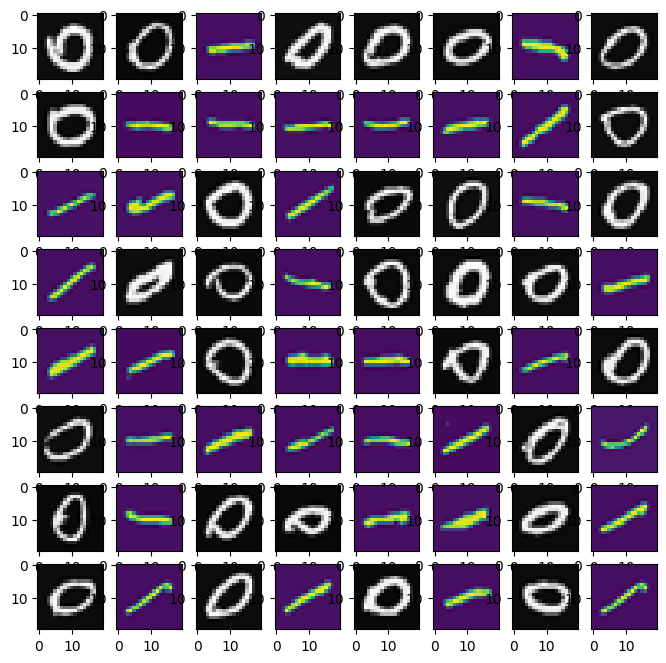

In [4]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [5]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [6]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               40100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45,671
Trainable params: 45,671
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[-0.09258543,  0.07376484,  0.1036166 , ...,  0.10888872,
         0.02250857, -0.07743491],
       [ 0.01619118, -0.06666726,  0.0928657 , ..., -0.04382168,
         0.07391658, -0.07529843],
       [ 0.02576058,  0.01189232,  0.0596453 , ...,  0.03258408,
        -0.04053961, -0.05719472],
       ...,
       [ 0.03419361, -0.09501749, -0.03153878, ...,  0.00529766,
        -0.00748278, -0.06587979],
       [ 0.00227402,  0.01045617,  0.10947182, ...,  0.00521667,
        -0.10631971, -0.10823786],
       [ 0.07973949,  0.07706086,  0.01633597, ...,  0.00385911,
        -0.04492605,  0.068409  ]], dtype=float32)>


In [8]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6611
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4357
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2476
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1703
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1124
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0966
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0846
Epoch 9/20
32/32 [==============================] - 0s 935us/step - loss: 0.0753
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0679
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0567
Epoch 13/20
32/32 [============================

In [9]:
X
# print(X[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 72ms/step
0
1/1 [==============================] - 0s 15ms/step
1


1/1 [==============================] - 0s 13ms/step


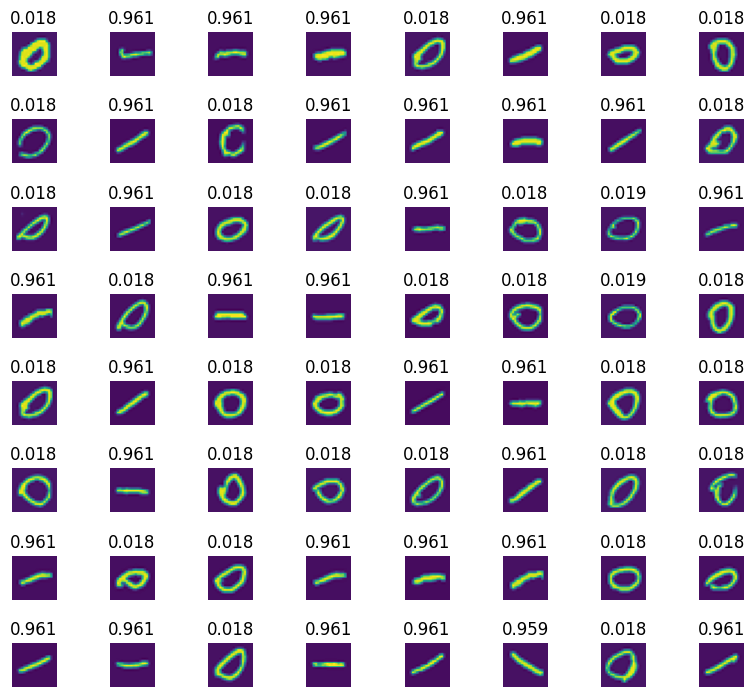

In [11]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


In [12]:
layer1,layer2,layer3,layer4 = model.layers

per_w1,per_b1 = layer1.weights
per_w2,per_b2 = layer2.weights
per_w3,per_b3 = layer3.weights
per_w4,per_b4 = layer4.weights
W = [per_w1,per_w2,per_w3,per_w4]
B = [per_b1,per_b2,per_b3,per_b4]

In [110]:
per_b1.shape
print(tf.reshape(X[0],[-1,1]).shape)
tf.transpose(W[0]).shape
X[0].shape
B[3].shape

(400, 1)


TensorShape([1])

In [113]:
def my_layer(a_in,per_w,per_b):
    k = tf.constant(tf.reshape(a_in,[-1,1]))
    k = tf.cast(k, tf.float32)
    tf.cast(per_w,dtype=tf.float32)
    return tf.transpose(per_w)@k + tf.reshape(per_b,[-1,1])
    # return tf.reshape(a_in,[1,-1])@per_w +per_b
def predict_(a_in,W,B):
    # a_out = []
    for i in range(len(W)):
        a_in = my_layer(a_in,W[i],B[i])
        # print(a_in.shape)

    return a_in

In [114]:
# fig,ax = pl.subplots(8,8,figsize=(8,8))
# fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(8):
    for j in range(8):
        r = random.randint(1,1000)
        t_f = (model.predict(X[r].reshape(1,400))[0][0])
        m_f = predict_(X[r],W,B)[0][0]
        print("-------------------------\n",t_f,"== ? :",m_f,"-----------------\n")
        # ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]),)
        # ax[i][j].imshow(X[r].reshape(20,20))
        # ax[i][j].set_axis_off()
        

1/1 [==============================] - 0s 32ms/step


InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]

In [ ]:
for r in range(len(right)):
    print(right[r],"------------------------",predict_(X[r],W,B)[0][0])

0.017808994 ------------------------ tf.Tensor(-2095.3127, shape=(), dtype=float32)
0.017889703 ------------------------ tf.Tensor(-1998.9244, shape=(), dtype=float32)
0.018091295 ------------------------ tf.Tensor(-1967.735, shape=(), dtype=float32)
0.018162338 ------------------------ tf.Tensor(-2431.2156, shape=(), dtype=float32)
0.018029818 ------------------------ tf.Tensor(-3039.752, shape=(), dtype=float32)
0.018280236 ------------------------ tf.Tensor(-2686.0588, shape=(), dtype=float32)
0.018184587 ------------------------ tf.Tensor(-2711.809, shape=(), dtype=float32)
0.01793608 ------------------------ tf.Tensor(-1458.4617, shape=(), dtype=float32)
0.01849665 ------------------------ tf.Tensor(-2779.93, shape=(), dtype=float32)
0.017883386 ------------------------ tf.Tensor(-2195.58, shape=(), dtype=float32)
0.018038066 ------------------------ tf.Tensor(-2628.6155, shape=(), dtype=float32)
0.019287875 ------------------------ tf.Tensor(-2293.1096, shape=(), dtype=float32)
0